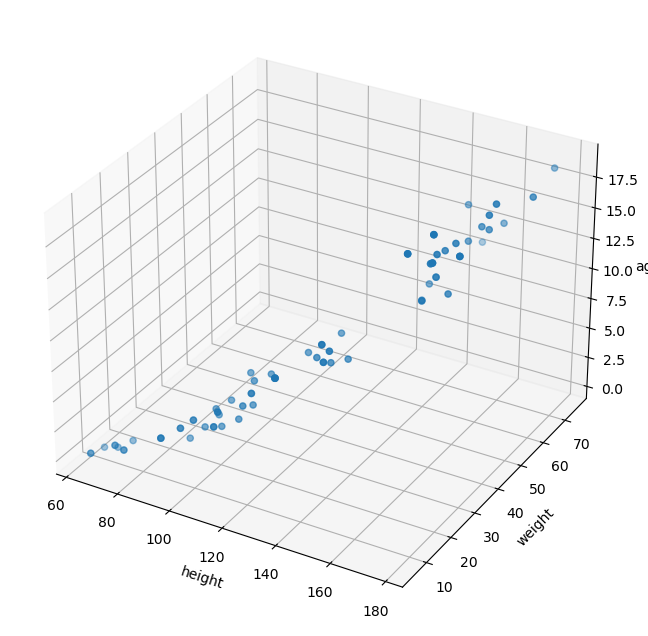

In [3]:
# 실습 1 - 제공된 데이터 파일을 불러들여 x축은 키, y축은 몸무게, z축은 나이를 나타내는 3차원 공간에 각 데이터의 위치를 점으로 표시

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# CSV 파일을 읽어 Pandas DataFrame으로 변환 
raw_data = pd.read_csv('multiple_linear_regression_data.csv', names = ['height', 'weight', 'age'])

height = raw_data['height'].to_numpy()
weight = raw_data['weight'].to_numpy()
age = raw_data['age'].to_numpy()

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')

ax.scatter(height, weight, age)
ax.set_xlabel('height')
ax.set_ylabel('weight')
ax.set_zlabel('age')

plt.show()

해석해 : 
 [[  0.16248137]
 [  0.01980255]
 [-12.27584624]]


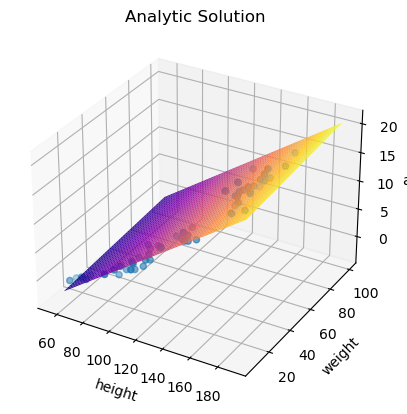

In [7]:
# 실습 2 - 해석해로 구한 선형모델과 데이터를 한 그래프에 표시

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# CSV 파일을 읽어 Pandas DataFrame으로 변환 
raw_data = pd.read_csv("C:/Coding/Python/machine_learning/week5/multiple_linear_regression_data.csv", names = ['height', 'weight', 'age'])

# raw_data
height = raw_data['height'].to_numpy()
weight = raw_data['weight'].to_numpy()
age = raw_data['age'].to_numpy()

# convert data
X = raw_data[['height', 'weight']].to_numpy()
X = np.c_[X, np.ones(len(X))]

y = raw_data['age'].to_numpy()
y = y.reshape((len(y), 1))

# X의 역행렬을 이용하여 해를 계산 
analytic_W = np.linalg.pinv(X.T @ X) @ X.T @ y
print(f"해석해 : \n {analytic_W}")

# plot
height_data = np.linspace(55, 190, 1000)
weight_data = np.linspace(10, 100, 1000)
Height, Weight = np.meshgrid(height_data, weight_data)
analytic_y = analytic_W[0]*Height + analytic_W[1]*Weight + analytic_W[2]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(height, weight, age)
ax.plot_surface(Height, Weight, analytic_y, cmap='plasma')
ax.set_xlabel('height')
ax.set_ylabel('weight')
ax.set_zlabel('age')
ax.set_title('Analytic Solution')

plt.show()

In [9]:
# 실습 3 - 해석해로 구한 선형모델의 평균제곱오차 구하기

import pandas as pd
import numpy as np

# MSE 함수 정의
def function_MSE(W, X, y):
    predictions = X @ W  # 예측값 계산
    squared_errors = (predictions - y) ** 2  # 오차의 제곱 계산
    mse = np.mean(squared_errors)  # 평균 제곱 오차 계산
    return mse

# CSV 파일을 읽어 Pandas DataFrame으로 변환 
raw_data = pd.read_csv("C:/Coding/Python/machine_learning/week5/multiple_linear_regression_data.csv", names=['height', 'weight', 'age'])

# convert data
X = raw_data[['height', 'weight']].values
X = np.concatenate([X, np.ones((X.shape[0], 1))], axis=1)
y = raw_data['age'].values.reshape(-1, 1)

# X의 역행렬을 이용하여 해를 계산 
analytic_W = np.linalg.pinv(X.T @ X) @ X.T @ y

mse = function_MSE(analytic_W, X, y)
print(f'mse : {mse}')

mse : 1.8425437561141673


해석해 : 
 [[  0.16248137]
 [  0.01980255]
 [-12.27584624]]
mse : 1.8425437561141673
랜덤하게 초기화한 가중치 값 : 
 [[ -0.98398781]
 [ -0.87928598]
 [-14.80305104]]
epoch : 0 ===============> W : [ -0.7459556   -0.81616164 -14.80129997], gradient : [-23803.22114237  -6312.4335272    -175.10710251], mse : 33410.50259937071
epoch : 1000 ===============> W : [  0.23326067  -0.17889061 -14.79981111], gradient : [  4.87783582 -18.59321686   0.30328487], mse : 5.072994184776042
epoch : 2000 ===============> W : [  0.20468041  -0.0699573  -14.80129574], gradient : [ 1.49403337 -5.69353945  0.04391357], mse : 2.2760706705405935
epoch : 3000 ===============> W : [  0.19592415  -0.03659674 -14.80126092], gradient : [ 0.45801037 -1.7440295  -0.03548652], mse : 2.021172052736958
epoch : 4000 ===============> W : [  0.19323743  -0.02637439 -14.800761  ], gradient : [ 0.14080982 -0.53480309 -0.05978461], mse : 1.9994541736574398
epoch : 5000 ===============> W : [  0.19240904  -0.02323628 -14.8001188 ], gradient 

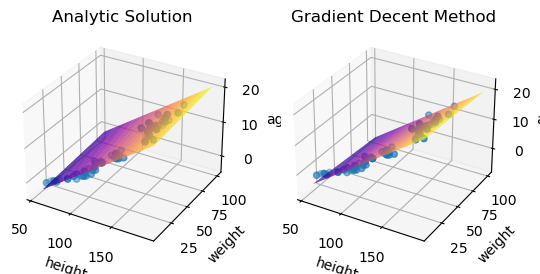

In [10]:
# 실습 4 - 경사하강법 프로그램을 이용해 최적 매개변수 구하기

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 경사하강법 함수 정의
def numerical_gradient(f, W, X, y):
    h = 1e-4
    grad = np.zeros_like(W) # W와 동일한 형태의 0으로 채워진 배열 생성

    for idx in range(W.size):   # W의 모든 원소에 대해 반복
        tmp_val = W[idx]     # 원래의 값 저장

        # f(W+h) 계산
        W[idx] = tmp_val+h
        fxh1 = f(W, X, y)

        # f(W-h) 계산
        W[idx] = tmp_val-h
        fxh2 = f(W, X, y)

        # 기울기 계산
        grad[idx] = (fxh1-fxh2) / (2*h)

        W[idx] = tmp_val    # 값 복원

    return grad

# MSE 함수 정의
def function_MSE(W,X,y):
    mse = np.zeros(len(X))  # MSE를 저장할 배열을 초기화

    # 각 데이터 포인트에 대해 MSE를 계산
    for idx in range(len(X)):
        mse[idx] = (np.dot(W.T, X[idx]) - y[idx]) ** 2  # 예측값과 실제값의 차이의 제곱을 계산
    
    mse = np.sum(mse) / len(X)   # 모든 데이터 포인트에 대한 MSE를 합하여 평균을 계산

    return mse

# CSV 파일을 읽어 Pandas DataFrame으로 변환 
raw_data = pd.read_csv("C:/Coding/Python/machine_learning/week5/multiple_linear_regression_data.csv", names = ['height', 'weight', 'age'])

# raw_data
height = raw_data['height'].to_numpy()
weight = raw_data['weight'].to_numpy()
age = raw_data['age'].to_numpy()

# convert data
X = raw_data[['height', 'weight']].to_numpy()
X = np.c_[X, np.ones(len(X))]

y = raw_data['age'].to_numpy()
y = y.reshape((len(y), 1))

# X의 역행렬을 이용하여 해를 계산 
analytic_W = np.linalg.pinv(X.T @ X) @ X.T @ y
print(f"해석해 : \n {analytic_W}")

mse = function_MSE(analytic_W, X, y)
print(f'mse : {mse}')

num_epoch = 100_000 # 경사하강법을 수행할 epoch 수
eta = 1e-5   # Learning Rate
errors = [] # 각 에포크마다의 MSE를 저장할 리스트 초기화

# GD
GD_W = np.ones((3, 1))  # 경사하강법으로 찾을 가중치 초기값 설정

GD_W[0] = np.random.uniform(low=-1.0, high=1.0)   # 경사하강법으로 찾을 GD_W[0] 가중치를 해석해와 유사한 값으로 무작위하게 설정
GD_W[1] = np.random.uniform(low=-1.0, high=1.0)   # 경사하강법으로 찾을 GD_W[1] 가중치를 해석해와 유사한 값으로 무작위하게 설정
GD_W[2] = np.random.uniform(low=-15.0, high=-10.0)   # 경사하강법으로 찾을 GD_W[2] 가중치를 해석해와 유사한 값으로 무작위하게 설정
print(f"랜덤하게 초기화한 가중치 값 : \n {GD_W}")

GD_W0_history = []  # W0의 변화를 저장할 리스트 초기화
GD_W1_history = []  # W1의 변화를 저장할 리스트 초기화
GD_W2_history = []  # W2의 변화를 저장할 리스트 초기화

for epoch in range (num_epoch):
    mse = function_MSE(GD_W, X, y) # 현재 가중치로의 MSE 계산
    gradient = numerical_gradient(function_MSE, GD_W, X, y)    # 현재 위치에서의 기울기 계산
    GD_W = GD_W - eta * gradient    # 경사하강법으로 가중치 업데이트

    if mse < 1.7:
        print("GD를 종료합니다.")
        break

    errors.append(mse)  # 현재 에포크의 MSE를 저장
    GD_W0_history.append(GD_W[0])   # 현재 W0를 저장
    GD_W1_history.append(GD_W[1])   # 현재 W1를 저장
    GD_W2_history.append(GD_W[2])   # 현재 W2를 저장
    if epoch % 1000 == 0:
        print(f"epoch : {epoch} ===============> W : {GD_W.flatten()}, gradient : {gradient.flatten()}, mse : {mse}")

print(f"결과 GD_W : \n {GD_W}")

# plot

height_data = np.linspace(55, 190, 1000)
weight_data = np.linspace(10, 100, 1000)
Height, Weight = np.meshgrid(height_data, weight_data)
analytic_y = analytic_W[0]*Height + analytic_W[1]*Weight + analytic_W[2]

fig = plt.figure()
ax1 = fig.add_subplot(121, projection='3d')  # Analytic Solution
ax2 = fig.add_subplot(122, projection='3d')  # Gradient Descent Method

ax1.scatter(height, weight, age)
ax1.plot_surface(Height, Weight, analytic_y, cmap='plasma')
ax1.set_xlabel('height')
ax1.set_ylabel('weight')
ax1.set_zlabel('age')
ax1.set_title('Analytic Solution')

GD_y =GD_W[0]*Height +GD_W[1]*Weight + GD_W[2]

ax2.scatter(height, weight, age)
ax2.plot_surface(Height, Weight, GD_y, cmap='plasma')
ax2.set_xlabel('height')
ax2.set_ylabel('weight')
ax2.set_zlabel('age')
ax2.set_title('Gradient Decent Method')

plt.show()

In [1]:
# 주어진 데이터에 대해 K개의 가우스 함수를 이용한 선형 기저함수회귀모델의 최적 매개변수(해석해)를 자동 계산하는 프로그램

import numpy as np
import pandas as pd

# 가우시안 함수 정의
def gaussian_basis(x, mu, sigma):
    return np.exp(-0.5 * ((x - mu) / sigma) ** 2)

# 가우시안 최적의 가중치 계산
def gaussian_weights(k, x, y):
    rho = ((max(x) - min(x)) / (k - 1))  # rho 계산
    centers = np.linspace(min(x), max(x), k)  # 중심 계산
    basis_functions = gaussian_basis(x[:, np.newaxis], centers, rho)  # 가우시안 함수 계산
    matrix = np.column_stack((basis_functions, np.ones(len(x))))  # 바이어스 항 추가
    weights = np.linalg.pinv(matrix.T @ matrix) @ matrix.T @ y  # 최적 가중치 계산
    y_predict = matrix @ weights
    mse = np.mean((y_predict - y) ** 2)  # MSE 계산
    return weights, mse

# CSV 파일을 읽어 Pandas DataFrame으로 변환 
raw_data = pd.read_csv("C:/Coding/Python/machine_learning/week5/linear_regression_data01.csv", names=['age', 'height'])

# raw_data
age = raw_data['age'].to_numpy()
height = raw_data['height'].to_numpy()

# 가우시안 기저 함수의 가중치 계산
k_values = [3, 5, 8]  # 다양한 기저 함수 개수에 대해 설정

# 각 K 값에 대해 최적의 가중치 계산
gaussian_weights_history = [gaussian_weights(k, age, height) for k in k_values]

# 결과 출력
for k, (weights, mse) in zip(k_values, gaussian_weights_history):
    print(f'\nk={k}, \ngaussian_weights = {weights}, \nMSE = {mse:.4f}')


k=3, 
gaussian_weights = [ 0.99557866  5.90764664 13.14040901  5.34004445], 
MSE = 0.5443

k=5, 
gaussian_weights = [-25.85546566   5.27827628 -18.94373778   6.19309345 -16.13153749
  37.26402946], 
MSE = 0.5357

k=8, 
gaussian_weights = [-1.13831218  1.56672026  2.8861904   2.49417908  2.37521706  9.31513781
 -2.26629064 11.36272625 11.17435832], 
MSE = 0.3730


[[1.         0.60653066 0.13533528 1.        ]
 [0.9965338  0.65695557 0.15932557 1.        ]
 [0.98620712 0.70664828 0.18627046 1.        ]
 [0.96923323 0.7548396  0.21626517 1.        ]
 [0.94595947 0.8007374  0.24935221 1.        ]
 [0.91685536 0.84354765 0.28551171 1.        ]
 [0.8824969  0.8824969  0.32465247 1.        ]
 [0.84354765 0.91685536 0.3666043  1.        ]
 [0.8007374  0.94595947 0.41111229 1.        ]
 [0.7548396  0.96923323 0.45783336 1.        ]
 [0.70664828 0.98620712 0.50633562 1.        ]
 [0.65695557 0.9965338  0.55610088 1.        ]
 [0.60653066 1.         0.60653066 1.        ]
 [0.55610088 0.9965338  0.65695557 1.        ]
 [0.50633562 0.98620712 0.70664828 1.        ]
 [0.45783336 0.96923323 0.7548396  1.        ]
 [0.41111229 0.94595947 0.8007374  1.        ]
 [0.3666043  0.91685536 0.84354765 1.        ]
 [0.32465247 0.8824969  0.8824969  1.        ]
 [0.28551171 0.84354765 0.91685536 1.        ]
 [0.24935221 0.8007374  0.94595947 1.        ]
 [0.21626517 

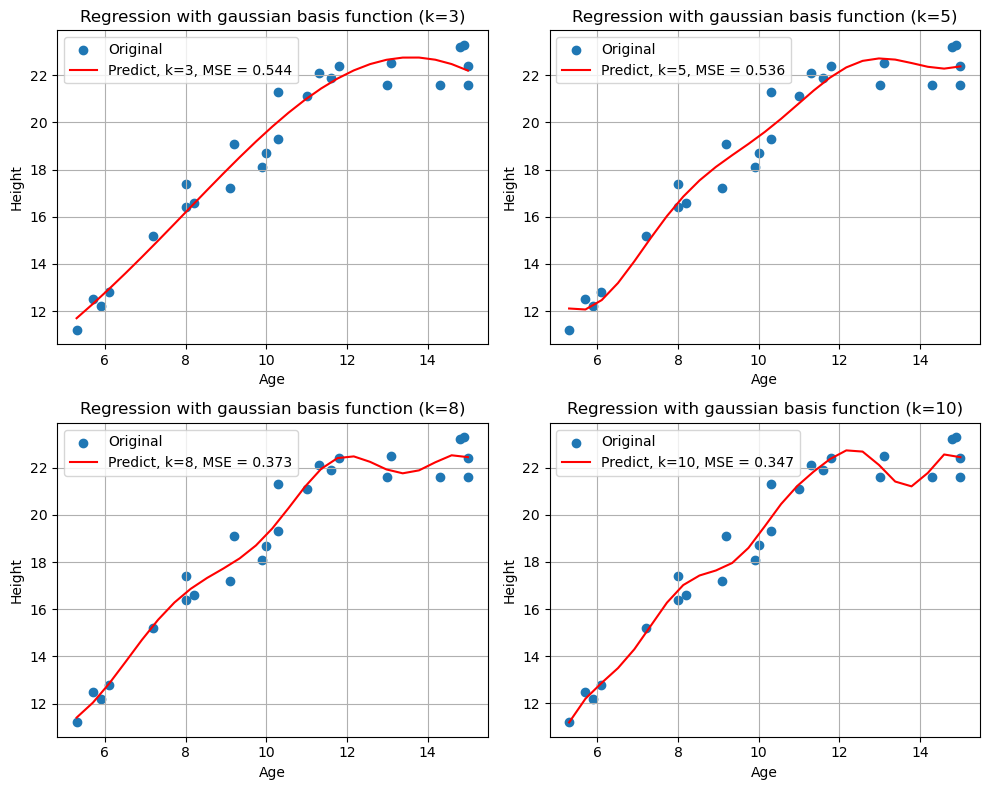

In [2]:
# 실습 6 - K = 3, 5, 8, 10일 때, 훈련 데이터와 선형 기저함수 회귀 모델을 그래프에 표시

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 가우시안 함수 정의
def gaussian_basis(x, mu, sigma):
    return np.exp(-0.5 * ((x - mu) / sigma) ** 2)

# 가우시안 최적의 가중치 계산
def gaussian_weights(k, x, y):
    rho = ((max(x) - min(x)) / (k - 1))  # 간격 계산
    centers = np.linspace(min(x), max(x), k)  # 중심 계산
    basis_functions = gaussian_basis(x[:, np.newaxis], centers, rho)  # 가우시안 함수 계산
    matrix = np.column_stack((basis_functions, np.ones(len(x))))  # 바이어스 항 추가
    weights = np.linalg.pinv(matrix.T @ matrix) @ matrix.T @ y  # 최적 가중치 계산
    y_predict = matrix @ weights
    mse = np.mean((y_predict - y) ** 2)  # MSE 계산
    return weights, mse

# plot
def plot_gaussian_regression(ax, age, height, k, weights, mse):
    age_ = np.linspace(np.min(age), np.max(age), len(age))
    data_range = (max(age) - min(age)) / (k - 1) # sigma
    centers = np.linspace(min(age), max(age), k)
    basis_functions = np.array([gaussian_basis(age_, center, data_range ) for center in centers]).T
    basis_functions = np.column_stack((basis_functions, np.ones(len(age_))))
    print(basis_functions)
    y_predict = basis_functions @ weights
    ax.scatter(age, height, label='Original')
    ax.plot(age_, y_predict, 'r', label=f'Predict, k={k}, MSE = {mse:.3f}')
    ax.set_ylabel('Height')
    ax.set_xlabel('Age')
    ax.set_title(f'Regression with gaussian basis function (k={k})')
    ax.legend()
    ax.grid()

# CSV 파일을 읽어 Pandas DataFrame으로 변환 
raw_data = pd.read_csv("C:/Coding/Python/machine_learning/week5/linear_regression_data01.csv", names=['age', 'height'])

# raw_data
age = raw_data['age'].to_numpy()
height = raw_data['height'].to_numpy()

# 가우시안 기저 함수의 가중치 계산
k_values = [3, 5, 8, 10]  # 다양한 기저 함수 개수에 대해 설정

# 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# subplot plot
for i in range(2):
    for j in range(2):
        k = k_values[i*2 + j]  # 각각의 서브플롯에 대해 같은 k 값을 사용

        weights, mse = gaussian_weights(k, age, height) # 가중치 계산

        # plot 호출
        plot_gaussian_regression(axs[i, j], age, height, k, weights, mse)

plt.tight_layout()
plt.show()

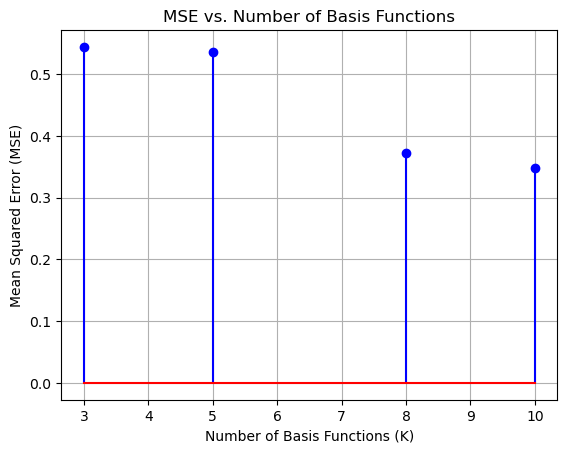

In [3]:
# 실습 7  - 실습 6에서 각 K개에 대한 평균제곱오차를 구하고 x축은 K값, y축은 평균제곱오차를 나타내는 2차원 그래프

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 가우시안 함수 정의
def gaussian_basis(x, mu, sigma):
    return np.exp(-0.5 * ((x - mu) / sigma) ** 2)

# 가우시안 최적의 가중치 계산
def gaussian_weights(k, x, y):
    rho = ((max(x) - min(x)) / (k - 1))  # 간격 계산
    centers = np.linspace(min(x), max(x), k)  # 중심 계산
    basis_functions = gaussian_basis(x[:, np.newaxis], centers, rho)  # 가우시안 함수 계산
    matrix = np.column_stack((basis_functions, np.ones(len(x))))  # 바이어스 항 추가
    weights = np.linalg.pinv(matrix.T @ matrix) @ matrix.T @ y  # 최적 가중치 계산
    y_predict = matrix @ weights
    mse = np.mean((y_predict - y) ** 2)  # MSE 계산
    return weights, mse

# MSE 계산 함수
def calculate_mse(k, age, height):
    weights, mse = gaussian_weights(k, age, height)
    return mse

# plot
def plot_mse_vs_k(k_values, mse_values):
    plt.stem(k_values, mse_values, linefmt='b-', markerfmt='bo', basefmt='r-')
    plt.xlabel('Number of Basis Functions (K)')
    plt.ylabel('Mean Squared Error (MSE)')
    plt.title('MSE vs. Number of Basis Functions')
    plt.grid(True)
    plt.show()

# CSV 파일을 읽어 Pandas DataFrame으로 변환 
raw_data = pd.read_csv("C:/Coding/Python/machine_learning/week5/linear_regression_data01.csv", names=['age', 'height'])

# raw_data
height = raw_data['height'].to_numpy() # 키 데이터 추출
age = raw_data['age'].to_numpy() # 나이 데이터 추출

# 가우시안 기저 함수의 가중치
k_values = [3, 5, 8, 10]  # 다양한 기저 함수 개수에 대해 설정

# MSE
mse_values = [calculate_mse(k, age, height) for k in k_values]

# 그래프 그리기 함수 호출
plot_mse_vs_k(k_values, mse_values)